In [1]:
import ipyvolume as ipv
import tyssue
import json
import matplotlib.pylab as plt
import numpy as np
import pandas as pd
import random
import sys
import tyssue.io.hdf5 as hdf5
from IPython.display import Image
from scipy import optimize
from tyssue.draw import sheet_view

from tyssue import Sheet
from tyssue import SheetGeometry

##### Own functions
import src.cellDivisionOld as cellDivisionOld
import src.cellDivision as cellDivision
import src.vertexModel as vertexModel
import src.inputMechanicalParameters as inputMechanicalParameters
import src.auxFunctions as auxFunctions
from tyssue.topology import add_vert

from tyssue.topology.base_topology import add_vert, close_face, collapse_edge, remove_face
from tyssue.topology.base_topology import split_vert as base_split_vert

collision solver could not be imported You may need to install CGAL and re-install tyssue


C++ extension are not available for this version


/Users/v_lachina/PycharmProjects/pythonProject/src/auxFunctions.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cellmap.edge_df['length_elasticity_ECM'][opposite_edge_indices] = cellmap.edge_df['length_elasticity_ECM'][edge]
/Users/v_lachina/PycharmProjects/pythonProject/src/auxFunctions.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cellmap.edge_df['length_elasticity_FRC'][opposite_edge_indices] = cellmap.edge_df['length_elasticity_FRC'][edge]
/Users/v_lachina/PycharmProjects/pythonProject/src/auxFunctions.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See

Topology changed!


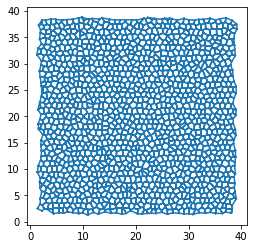

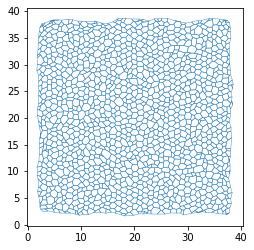

In [2]:
#### Initialize Model
[cellmap_init, geom, energyContributions_model] = vertexModel.initialize()

## Update mechanical parameters
cellmap_init = inputMechanicalParameters.update(cellmap_init)

## Initial stage
energyContributions_model.compute_energy(cellmap_init)

## RUN
[cellmap_H, geom, model_H, history_H] = vertexModel.solveEuler(cellmap_init, geom, energyContributions_model, endTime = 100)


fig, ax = sheet_view(cellmap_H, ['y', 'x'], edge={"color":1, 'colormap': 'Greys'})
#auxFunctions.create_frames(history_H, './results', edge={'color':'black'})
#auxFunctions.exportToMesh(history_H, './results')

import warnings
warnings.filterwarnings("ignore")

In [3]:
cellmap_H.edge_df

,trgt,nz,length,face,srce,dx,dy,sx,sy,tx,...,uy,rx,ry,sub_area,is_active,length_elasticity,prefered_length,uz,length_elasticity_ECM,length_elasticity_FRC
edge,,,,,,,,,,,,,,,,,,,,,
0,13,-0.106888,0.330753,1302,0,0.056679,0.325860,1.973127,37.140838,2.029806,...,0.985208,-0.296877,0.179038,-0.053444,1,1010.245305,0.819551,0.57735,45.155598,965.089707
1,0,0.018569,0.330753,1340,13,-0.056679,-0.325860,2.029806,37.466698,1.973127,...,-0.985208,-0.055688,0.007456,0.009285,1,1010.245305,0.075606,0.57735,45.155598,965.089707
2,2,0.345355,0.917497,1341,0,0.915622,-0.058622,1.973127,37.140838,2.888749,...,-0.063894,-0.711542,-0.331624,0.172677,1,511.351106,0.907572,0.57735,40.519374,470.831731
3,0,0.146527,0.917497,1302,2,-0.915622,0.058622,2.888749,37.082216,1.973127,...,0.063894,0.618745,0.120416,0.073264,1,511.351106,0.765663,0.57735,40.519374,470.831731
4,3,0.196017,0.684922,1303,2,-0.455484,-0.511519,2.888749,37.082216,2.433264,...,-0.746829,-0.201704,0.203830,0.098008,1,665.337712,0.533066,0.57735,51.294736,614.042976
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8128,541,0.342393,1.071575,483,1025,-0.200886,-1.052576,2.374882,15.699635,2.173996,...,-0.982271,-0.208282,0.613088,0.171197,1,496.753632,0.599353,0.57735,41.559621,455.194011
8129,784,-0.004375,1.092011,1005,341,-0.210872,1.071457,38.210530,27.512302,37.999658,...,0.981178,0.115711,-0.608681,-0.002187,1,130.377417,0.694052,0.57735,43.928205,86.449213
8130,2182,0.235482,0.658280,1006,1712,0.345835,-0.560116,1.847040,29.205966,2.192875,...,-0.850879,-0.551080,0.211622,0.117741,1,841.530114,0.207257,0.57735,44.397435,797.132679


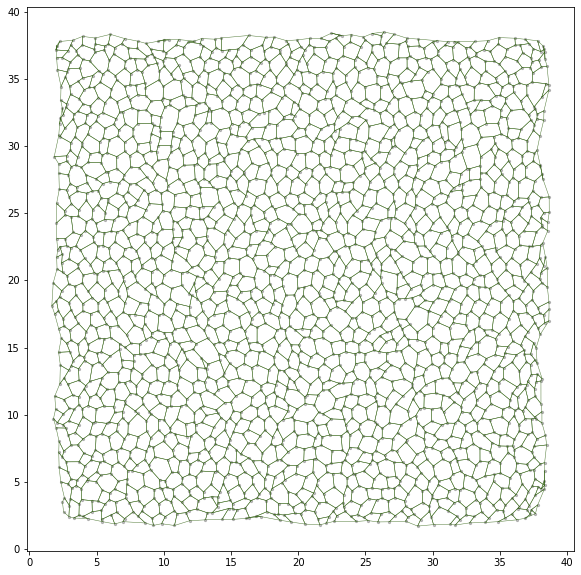

In [4]:
auxFunctions.draw_vert(cellmap_H)

In [5]:
cellmap_H, new_edges_indices, new_opp_edges_indices, new_vertices_indices = cellDivision.ln_divide_FRCs(cellmap_H, "length", 5, energyContributions_model)

199
Int64Index([1446], dtype='int64', name='edge')
Chosen edge: 1446
New vert: 2762
New Edge: 8133
New opposite edge: 8134
1
Int64Index([1452], dtype='int64')
Chosen edge: 1452
New vert: 2763
New Edge: 8135
New opposite edge: 8136
2
Int64Index([5640], dtype='int64')
Chosen edge: 5640
New vert: 2764
New Edge: 8137
New opposite edge: 8138
3
Int64Index([5242], dtype='int64')
Chosen edge: 5242
New vert: 2765
New Edge: 8139
New opposite edge: 8140
4
Int64Index([7508], dtype='int64')
Chosen edge: 7508
New vert: 2766
New Edge: 8141
New opposite edge: 8142
5
Int64Index([2203], dtype='int64')
Chosen edge: 2203
New vert: 2767
New Edge: 8143
New opposite edge: 8144
6
Int64Index([2211], dtype='int64')
Chosen edge: 2211
New vert: 2768
New Edge: 8145
New opposite edge: 8146
7
Int64Index([7914], dtype='int64')
Chosen edge: 7914
New vert: 2769
New Edge: 8147
New opposite edge: 8148
8
Int64Index([3016], dtype='int64')
Chosen edge: 3016
New vert: 2770
New Edge: 8149
New opposite edge: 8150
9
Int64Index(

76
Int64Index([5368], dtype='int64')
Chosen edge: 5368
New vert: 2838
New Edge: 8285
New opposite edge: 8286
77
Int64Index([2888], dtype='int64')
Chosen edge: 2888
New vert: 2839
New Edge: 8287
New opposite edge: 8288
78
Int64Index([5446], dtype='int64')
Chosen edge: 5446
New vert: 2840
New Edge: 8289
New opposite edge: 8290
79
Int64Index([3055], dtype='int64')
Chosen edge: 3055
New vert: 2841
New Edge: 8291
New opposite edge: 8292
80
Int64Index([6063], dtype='int64')
Chosen edge: 6063
New vert: 2842
New Edge: 8293
New opposite edge: 8294
81
Int64Index([1748], dtype='int64')
Chosen edge: 1748
New vert: 2843
New Edge: 8295
New opposite edge: 8296
82
Int64Index([5732], dtype='int64')
Chosen edge: 5732
New vert: 2844
New Edge: 8297
New opposite edge: 8298
83
Int64Index([615], dtype='int64')
Chosen edge: 615
New vert: 2845
New Edge: 8299
New opposite edge: 8300
84
Int64Index([3241], dtype='int64')
Chosen edge: 3241
New vert: 2846
New Edge: 8301
New opposite edge: 8302
85
Int64Index([3819],

151
Int64Index([4948], dtype='int64')
Chosen edge: 4948
New vert: 2913
New Edge: 8435
New opposite edge: 8436
152
Int64Index([4504], dtype='int64')
Chosen edge: 4504
New vert: 2914
New Edge: 8437
New opposite edge: 8438
153
Int64Index([5372], dtype='int64')
Chosen edge: 5372
New vert: 2915
New Edge: 8439
New opposite edge: 8440
154
Int64Index([2770], dtype='int64')
Chosen edge: 2770
New vert: 2916
New Edge: 8441
New opposite edge: 8442
155
Int64Index([138], dtype='int64')
Chosen edge: 138
New vert: 2917
New Edge: 8443
New opposite edge: 8444
156
Int64Index([6428], dtype='int64')
Chosen edge: 6428
New vert: 2918
New Edge: 8445
New opposite edge: 8446
157
Int64Index([35], dtype='int64')
Chosen edge: 35
New vert: 2919
New Edge: 8447
New opposite edge: 8448
158
Int64Index([5438], dtype='int64')
Chosen edge: 5438
New vert: 2920
New Edge: 8449
New opposite edge: 8450
159
Int64Index([3103], dtype='int64')
Chosen edge: 3103
New vert: 2921
New Edge: 8451
New opposite edge: 8452
160
Int64Index([

In [6]:
def edges_list_without_opposites(cellmap):
    # Create a set to keep track of edge pairs that have been processed
    
    edges_without_opposites_indices = []
    border_edges_indices = []


    processed_edge_pairs = set()

    for idx, edge in cellmap.edge_df.iterrows():
        srce, trgt = edge['srce'], edge['trgt']
        reversed_edge = (cellmap.edge_df['srce'] == trgt) & (cellmap.edge_df['trgt'] == srce)
        edge_pair_id = tuple(sorted((srce, trgt)))

    # Check if the edge pair has already been processed and it's an edge without an opposite edge
        if edge_pair_id not in processed_edge_pairs and reversed_edge.any():
        # Mark the edge pair as processed
            processed_edge_pairs.add(edge_pair_id)
        # Add the edge to the filtered list
            edges_without_opposites_indices.append(idx)
            
        if not reversed_edge.any():
            border_edges_indices.append(idx)

    return edges_without_opposites_indices, border_edges_indices

In [7]:
def ln_divide_FRC(eptm, edge):

    ### function adapted from add_vert in tyssue (https://tyssue.readthedocs.io/en/latest/source/tyssue.topology.html#tyssue.topology.base_topology.add_vert)

    srce, trgt = eptm.edge_df.loc[edge, ["srce", "trgt"]]

    logger = logging.getLogger(name=__name__)
    logger.debug(f"adding vertex between {srce} and {trgt}")
    
    ### find the opposite half-edge

    opposites = eptm.edge_df[
    (eptm.edge_df["srce"] == trgt) & (eptm.edge_df["trgt"] == srce)]
    opp_edges = opposites.index

    ### find any parallel edges

    parallels = eptm.edge_df[
    (eptm.edge_df["srce"] == srce) & (eptm.edge_df["trgt"] == trgt)]
    
    ### creates a new row in vert_df that has a specific srce value 

    new_vert = eptm.vert_df.loc[srce:srce]
    
    ### joins the new new_vert row with vert_df

    eptm.vert_df = pd.concat([eptm.vert_df, new_vert], ignore_index=True)
    
    ### assigns an index to the new_vert at the end of dataframe

    new_vert = eptm.vert_df.index[-1]
    
    ### updates its coordinates with mean of original srce and trgt vertices

    eptm.vert_df.loc[new_vert, eptm.coords] = eptm.vert_df.loc[
    [srce, trgt], eptm.coords
    ].mean(numeric_only=True)

    eptm.edge_df.loc[parallels.index, "trgt"] = new_vert
    
    ### add new edges

    eptm.edge_df = pd.concat([eptm.edge_df, parallels], ignore_index=True)
    new_edges = eptm.edge_df.index[-parallels.index.size :]
    
    ### update src and trg of new_edges

    eptm.edge_df.loc[new_edges, "srce"] = new_vert
    eptm.edge_df.loc[new_edges, "trgt"] = trgt
    
    ### add new opposite edges

    new_opp_edges = []

    if len(opposites.index):
        eptm.edge_df.loc[opposites.index, "srce"] = new_vert
        eptm.edge_df = pd.concat([eptm.edge_df, opposites], ignore_index=True)
        new_opp_edges = eptm.edge_df.index[-opposites.index.size :]
        
    ### assign trgt and srce to new_opposite_edges

        eptm.edge_df.loc[new_opp_edges, "trgt"] = new_vert
        eptm.edge_df.loc[new_opp_edges, "srce"] = trgt


    new_length_elasticity_FRC = eptm.edge_df.loc[edge, 'length_elasticity_FRC'] / 2

    eptm.edge_df.loc[edge, 'length_elasticity_FRC'] = new_length_elasticity_FRC
    eptm.edge_df.loc[new_edges, "length_elasticity_FRC"] = new_length_elasticity_FRC
    eptm.edge_df.loc[new_opp_edges, "length_elasticity_FRC"] = new_length_elasticity_FRC
    eptm.edge_df.loc[opp_edges, 'length_elasticity_FRC'] = new_length_elasticity_FRC


    new_prefered_length_FRC = eptm.edge_df["length"].mean()

    eptm.edge_df.loc[edge, 'prefered_length'] = new_prefered_length_FRC
    eptm.edge_df.loc[new_edges, "prefered_length"] = new_prefered_length_FRC
    eptm.edge_df.loc[new_opp_edges, "prefered_length"] = new_prefered_length_FRC
    eptm.edge_df.loc[opp_edges, 'prefered_length'] = new_prefered_length_FRC


    # ## Sheet special case
    if len(new_edges) == 1:
        new_edges = new_edges[0]
    if len(new_opp_edges) == 1:
        new_opp_edges = new_opp_edges[0]
    elif len(new_opp_edges) == 0:
        new_opp_edges = None
    return new_vert, new_edges, new_opp_edges, opp_edges

In [8]:
def ln_divide_FRCs(sheet, condition, percent, energyContributions_model):

    edges_without_opposites_indices, border_edges_indices = edges_list_without_opposites(sheet)

    filtered_edges = sheet.edge_df.loc[edges_without_opposites_indices]
    num_to_select = int(percent / 100 * len(filtered_edges))
    print(num_to_select)

    new_edges_indices = []
    new_opp_edges_indices = []
    new_vertices_indices = []
    
    selected_edges = set()
    
    while len(selected_edges) < num_to_select:
    # Get a random edge index
    
        edges_for_choice = filtered_edges[filtered_edges[condition] == filtered_edges[condition].max()]
        
        print(edges_for_choice.index)

        longest_edge_id = random.choice(edges_for_choice.index)
        
        selected_edges.add(longest_edge_id)

        # Visualize and process the selected edge

        print("Chosen edge:", longest_edge_id)
        
        new_vert, new_edges, new_opp_edges, opp_edges = ln_divide_FRC(sheet, longest_edge_id)
        new_edges_indices.append(new_edges)
        new_opp_edges_indices.append(new_opp_edges)
        new_vertices_indices.append(new_vert)

        
        print("New vert:", new_vert)
        print("New Edge:", new_edges)
        print("New opposite edge:", new_opp_edges)
                
        geom.update_all(sheet)
        
        energyContributions_model.compute_energy(sheet)
        vertexModel.solveEuler(sheet, geom, energyContributions_model, 20)
            
        edges_without_opposites_indices, border_edges_indices = edges_list_without_opposites(sheet)
        filtered_edges = sheet.edge_df.loc[edges_without_opposites_indices]
            
        print(len(selected_edges))
        if len(selected_edges) == num_to_select:
            break  # Break out of the loop



    return sheet, new_edges_indices, new_opp_edges_indices, new_vertices_indices

In [9]:
import logging

In [10]:
cellmap_H, new_edges_indices, new_opp_edges_indices, new_vertices_indices = ln_divide_FRCs(cellmap_H, "length", 5, energyContributions_model)

209
Int64Index([2456], dtype='int64')
Chosen edge: 2456
New vert: 2961
New Edge: 8531
New opposite edge: 8532
1
Int64Index([2454], dtype='int64')
Chosen edge: 2454
New vert: 2962
New Edge: 8533
New opposite edge: 8534
2
Int64Index([6904], dtype='int64')
Chosen edge: 6904
New vert: 2963
New Edge: 8535
New opposite edge: 8536
3
Int64Index([5774], dtype='int64')
Chosen edge: 5774
New vert: 2964
New Edge: 8537
New opposite edge: 8538
4
Int64Index([7570], dtype='int64')
Chosen edge: 7570
New vert: 2965
New Edge: 8539
New opposite edge: 8540
5
Int64Index([2784], dtype='int64')
Chosen edge: 2784
New vert: 2966
New Edge: 8541
New opposite edge: 8542
6
Int64Index([4090], dtype='int64')
Chosen edge: 4090
New vert: 2967
New Edge: 8543
New opposite edge: 8544
7
Int64Index([4186], dtype='int64')
Chosen edge: 4186
New vert: 2968
New Edge: 8545
New opposite edge: 8546
8
Int64Index([6352], dtype='int64')
Chosen edge: 6352
New vert: 2969
New Edge: 8547
New opposite edge: 8548
9
Int64Index([5214], dtype

76
Int64Index([5278], dtype='int64')
Chosen edge: 5278
New vert: 3037
New Edge: 8683
New opposite edge: 8684
77
Int64Index([5586], dtype='int64')
Chosen edge: 5586
New vert: 3038
New Edge: 8685
New opposite edge: 8686
78
Int64Index([2844], dtype='int64')
Chosen edge: 2844
New vert: 3039
New Edge: 8687
New opposite edge: 8688
79
Int64Index([2864], dtype='int64')
Chosen edge: 2864
New vert: 3040
New Edge: 8689
New opposite edge: 8690
80
Int64Index([7624], dtype='int64')
Chosen edge: 7624
New vert: 3041
New Edge: 8691
New opposite edge: 8692
81
Int64Index([4285], dtype='int64')
Chosen edge: 4285
New vert: 3042
New Edge: 8693
New opposite edge: 8694
82
Int64Index([5090], dtype='int64')
Chosen edge: 5090
New vert: 3043
New Edge: 8695
New opposite edge: 8696
83
Int64Index([4556], dtype='int64')
Chosen edge: 4556
New vert: 3044
New Edge: 8697
New opposite edge: 8698
84
Int64Index([462], dtype='int64')
Chosen edge: 462
New vert: 3045
New Edge: 8699
New opposite edge: 8700
85
Int64Index([4534],

150
Int64Index([4291], dtype='int64')
Chosen edge: 4291
New vert: 3112
New Edge: 8832
New opposite edge: 8833
Topology changed!
151
Int64Index([6077], dtype='int64', name='edge')
Chosen edge: 6077
New vert: 3113
New Edge: 8834
New opposite edge: 8835
152
Int64Index([5304], dtype='int64')
Chosen edge: 5304
New vert: 3114
New Edge: 8836
New opposite edge: 8837
153
Int64Index([6598], dtype='int64')
Chosen edge: 6598
New vert: 3115
New Edge: 8838
New opposite edge: 8839
154
Int64Index([6033], dtype='int64')
Chosen edge: 6033
New vert: 3116
New Edge: 8840
New opposite edge: 8841
155
Int64Index([6085], dtype='int64')
Chosen edge: 6085
New vert: 3117
New Edge: 8842
New opposite edge: 8843
156
Int64Index([4321], dtype='int64')
Chosen edge: 4321
New vert: 3118
New Edge: 8844
New opposite edge: 8845
157
Int64Index([3059], dtype='int64')
Chosen edge: 3059
New vert: 3119
New Edge: 8846
New opposite edge: 8847
158
Int64Index([6209], dtype='int64')
Chosen edge: 6209
New vert: 3120
New Edge: 8848
New

KeyboardInterrupt: 

In [ ]:
auxFunctions.heatmap_of_edges(cellmap_H, cellmap_H.edge_df["length"])
plt.title('FRC Lengths Heatman', fontsize = 20)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap


cellmap_H.edge_df["color_edges"] = 0
cellmap_H.edge_df['edge_width'] = 1

    
cellmap_H.edge_df.loc[new_edges_indices, "color_edges"] = 256
cellmap_H.edge_df.loc[new_edges_indices, 'edge_width'] = 4




specs = {
    'face': {
        'visible': False,
    },
    'edge': {
            'visible': True,
            'color': cellmap_H.edge_df['color_edges'],
            'colormap': 'coolwarm',
            'width' : cellmap_H.edge_df['edge_width'],
    },
    'vert': {
        'visible': True,
        'color' : '#000a4b',
        's' : 20,
    }
}



fig, ax = sheet_view(cellmap_H, **specs)
fig.set_size_inches((15, 15))

ax.set_facecolor('#EFEFEF')  # Set background color to light gray


# Add grid lines
ax.grid(True, linestyle='--', linewidth=0.5, color='gray')

#ax.set_zorder(0)  # Set a lower zorder value to move the background to the back

plt.title('Spatial distribution of daughter FRCs', fontsize = 20)

plt.show()


In [ ]:
cellmap_H.edge_df.loc[new_edges_indices]['length'].mean()

In [ ]:
new_edges_indices

In [ ]:
vertex_valence = cellmap_H.edge_df.groupby("srce").size()
vertex_valence
triple_junctions = (vertex_valence == 3).sum()
quadruple_junctions = (vertex_valence == 4).sum()
print("Number of triple junctions:", triple_junctions)
print("Number of quadruple junctions:", quadruple_junctions)